<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Praktikum

1. Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara
manual
<br> Sumber: https://theailearner.com/2019/07/16/global-thresholding/

In [4]:
def global_threshold(image, thres_value, val_high, val_low, type):
    img = image.copy()

    if type == 'THERSHOLD_BINARY':
        for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              if image[i,j] > thres_value:
                  img[i,j] = val_high
              else:
                  img[i,j] = 0
    elif type == 'THERSHOLD_BINARY_INV':
        for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              if image[i,j] > thres_value:
                  img[i,j] = 0
              else:
                  img[i,j] = val_high
    elif type == 'THERSHOLD_TRUNC':
        for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              if image[i,j] > thres_value:
                  img[i,j] = thres_value
              else:
                  img[i,j] = img[i,j]
    elif type == 'THERSHOLD_TOZERO':
        for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              if image[i,j] > thres_value:
                  img[i,j] = img[i,j]
              else:
                  img[i,j] = 0
    else:
        for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              if image[i,j] > thres_value:
                  img[i,j] = 0
              else:
                  img[i,j] = img[i,j]

    return img

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbbdbfceb90>,
 Text(0.5, 1.0, 'TOZERO_INV'))

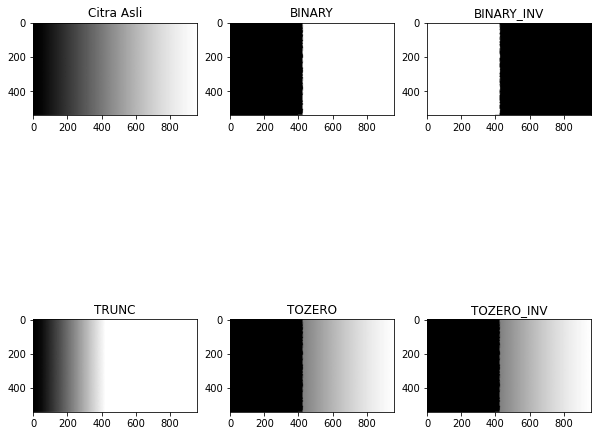

In [15]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 10/Source/gradient.jpg', cv.IMREAD_GRAYSCALE)

thresh_value = 127

img_thresh_binary = global_threshold(img, thresh_value, 255, 0, 'THERSHOLD_BINARY')
img_thresh_binary_inv = global_threshold(img, thresh_value, 255, 0, 'THERSHOLD_BINARY_INV')
img_thresh_binary_trunc = global_threshold(img, thresh_value, 255, 0, 'THERSHOLD_TRUNC')
img_thresh_binary_tozero = global_threshold(img, thresh_value, 255, 0, 'THERSHOLD_TOZERO')
img_thresh_binary_tozero_inv = global_threshold(img, thresh_value, 255, 0, 'THERSHOLD_TOZERO_INV')

plt.figure(figsize=(10,10))

plt.imshow(img_thresh_binary, cmap='gray')

plt.subplot(231),plt.imshow(img, cmap ='gray'),plt.title('Citra Asli')
plt.subplot(232),plt.imshow(img_thresh_binary, cmap ='gray'),plt.title('BINARY')
plt.subplot(233),plt.imshow(img_thresh_binary_inv, cmap ='gray'),plt.title('BINARY_INV')
plt.subplot(234),plt.imshow(img_thresh_binary_trunc, cmap ='gray'),plt.title('TRUNC')
plt.subplot(235),plt.imshow(img_thresh_binary_tozero, cmap ='gray'),plt.title('TOZERO')
plt.subplot(236),plt.imshow(img_thresh_binary_tozero, cmap ='gray'),plt.title('TOZERO_INV')

2. Otsu Thresholding

In [6]:
def otsu_threshold(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = 93
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

(<matplotlib.image.AxesImage at 0x7fbbde4f3b50>, Text(0.5, 1.0, 'Citra Asli'))

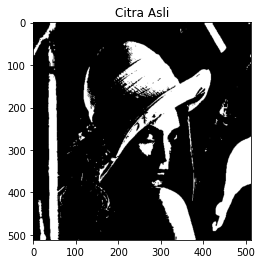

In [7]:
img_lena = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 10/Source/lena.jpg', cv.IMREAD_GRAYSCALE)
img_otsu = otsu_threshold(img_lena)

plt.imshow(img_otsu, cmap ='gray'),plt.title('Citra Asli')

3. Histogram Citra Tersegmentasi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

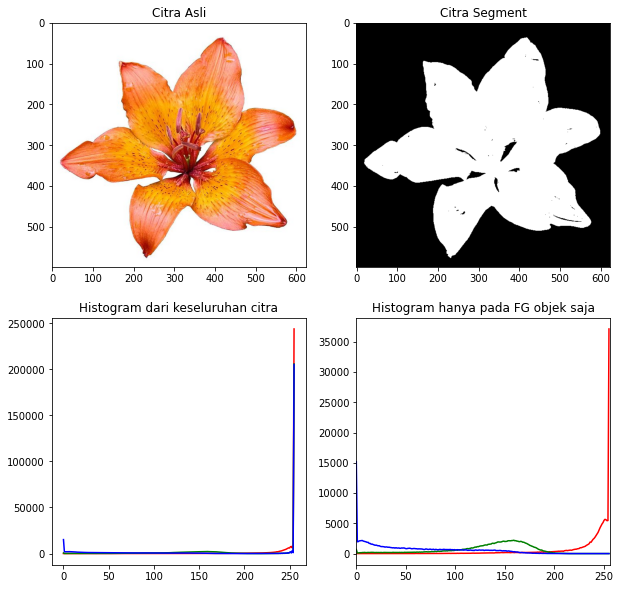

In [8]:
img_lily = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 10/Source/lily.jpg')
img_lily = cv.cvtColor(img_lily, cv.COLOR_BGR2RGB) 
img_lily_gray = cv.cvtColor(img_lily,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_lily_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))

plt.subplot(2,2,1),plt.imshow(img_lily) 
plt.title('Citra Asli') 

plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 

color = ('r','g','b') 
for i, col in enumerate(color):
    hist0 = cv.calcHist([img_lily],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 

    hist1 = cv.calcHist([img_lily],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

3. Segmentasi warna kuning
<br> Sumber: https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbbde454110>,
 <matplotlib.image.AxesImage at 0x7fbbdc111dd0>)

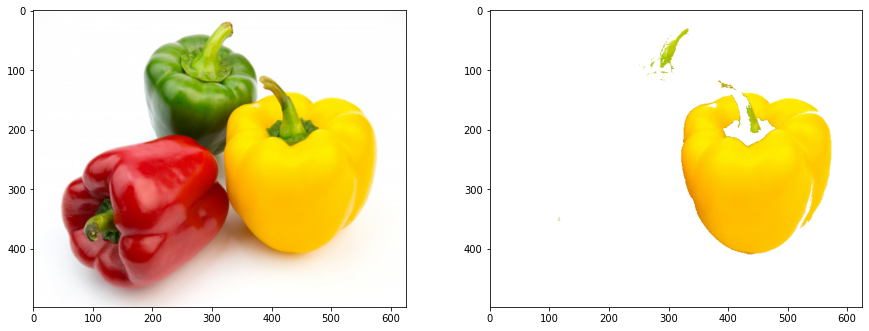

In [22]:
img_peppers = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 10/Source/peppers.jpg')
img_peppers = cv.cvtColor(img_peppers, cv.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img_peppers.reshape((-1,3))
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
 
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_peppers)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_peppers.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_peppers)
plt.subplot(2,2,2),plt.imshow(masked_image0)

5. Crosswords

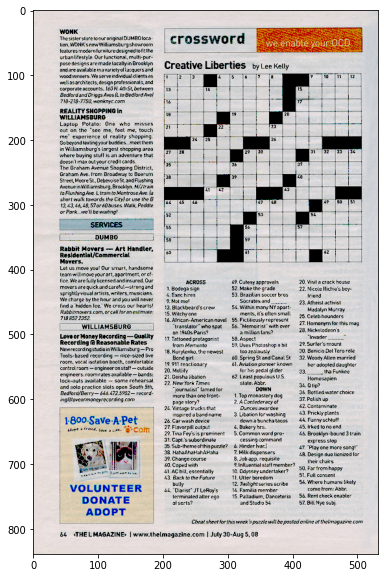

In [14]:
img_crossword = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 10/Source/crossword.jpg')
img_crossword = cv.cvtColor(img_crossword, cv.COLOR_BGR2RGB)

ret, thresh = cv.threshold(img_crossword, 125, 255, cv.THRESH_TOZERO)

plt.figure(figsize=(10,10))
plt.imshow(thresh)
cv.waitKey(0)
cv.destroyAllWindows()